In [12]:
#math and linear algebra stuff
import numpy as np

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# Hilbert transform

## Introduction

### Hilbert transform in direct space

Hilbert transform is a very common tool in signal processing. it is a linear operator, that takes a function, say $u(t)$ and poduces a function $\mathcal{H}(u)(t)$ with the same domain.

In the framework of continuous functions, it can be defined as a convolution with the Hilbert kernel $h(t) = \frac{1}{\pi t}$:

\begin{align*}
    \mathcal{H}(u)(t) &=\\
    &= \int_{-\infty}^{\infty} u(\tau)h(t-\tau) d\tau\\
    &= \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{u(\tau)}{t-\tau} d\tau
\end{align*}

Unfortunately, as one may have noticed, there are several problems with this expression
- $u(\tau)h(t-\tau)$ has a singularity in $\tau$
- $u(\tau)h(t-\tau)$ does not decay fast enough to be integrable over $\mathbb{R}$

We deal with the signularity problem using Cauchy pricipal value in $\tau$, ie
\begin{align*}
    \mathcal{H}(u)(t) &=\text{p.v} \int_{-\infty}^{\infty} u(\tau)h(t-\tau) d\tau\\
    &= \underset{\epsilon \rightarrow 0^+}{lim} \frac{1}{\pi} \left[ \int_{-\infty}^{t-\epsilon} \frac{u(\tau)}{t-\tau} d\tau + \int_{t+\epsilon}^{\infty} \frac{u(\tau)}{t-\tau} d\tau \right]\\
    &= -\frac{1}{\pi} \underset{\epsilon \rightarrow 0^+}{lim} \int_{\epsilon}^{\infty} \frac{u(t+\tau)-u(t-\tau)}{\tau} d\tau
\end{align*}

As a consequence, it can be shown that $\mathcal{H}(\mathcal{H}(u))(t) = -u(t)$

### Hilbert transform in Fourier space

The expression of the Hilbert transform of a function in Fourier space is much more friendly:
$$
    \mathcal{F}(\mathcal{H}(u))(f) = (-j \text{sign}(f)) \mathcal{F}(u)(f)
$$
$where \mathcal{F}$ is the Fourier transform, $j = \sqrt{-1}, \in \mathbb{I}$ and $\text{sign}$ being defined as:
$$
    \text{sign}(x) =
    \begin{cases}
        -1&{\text{if }} x<0, \\
        0 &{\text{if }} x=0, \\
        1 &{\text{if }} x>0, \\
    \end{cases}
$$

## Hermitian symmetry of real signals

Before jumping onto practical use of Hilbert transform, we must recall some properties of the Fourier transform of even/odd functions in $\mathbb{R}$:<br>

Let $g$ be a real, and square integrable function of $\mathbb{R}$ let's derive its Fourier transform:<br>

\begin{align*}
    \mathcal{F}(g)(f) &= \int_{-\infty}^{\infty} g(x) e^{-2\pi j f x} dx \\
     &= \int_{-\infty}^{\infty} g(x) (cos(-2\pi j f x) + j sin(-2\pi j f x)) dx \\
     &= \int_{-\infty}^{\infty} g(x) cos(-2\pi j f x) dx + j \int_{-\infty}^{\infty} g(x) sin(-2\pi j f x)) dx \\
     &= a(f) + j b(f) \\
\end{align*}

We can see, without doing any additional assumption about $g$, that the Fourier transform of a real a function can be divided into a real part $a(f)$ and an imaginary part $b(f)$

Let's take a closer look a the real part $a(f)$:

\begin{align*}
    a(f) &= \int_{-\infty}^{\infty} g(x) cos(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{0}^{\infty} g(x) cos(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{0}^{-\infty} g(-x) cos(2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{-\infty}^{0} g(-x) cos(-2\pi j f x)) dx  \quad \text{because cos is even}\\
    &= \int_{-\infty}^{0} (g(x)+g(-x)) cos(-2\pi j f x)) dx \\
    &= \int_{-\infty}^{0} (g(x)+g(-x)) cos(-2\pi j (-f) x)) dx \\
    &= a(-f)
\end{align*}

It can easily be seen that, if $g$ is an odd function, then its Fourier transform will be imaginary, anyway, the real part of its Fourier transform will be even

Let's take a closer look a the imaginary part $b(f)$:
\begin{align*}
    b(f) &= \int_{-\infty}^{\infty} g(x) sin(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx + \int_{0}^{\infty} g(x) sin(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx + \int_{0}^{-\infty} g(-x) sin(2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx - \int_{-\infty}^{0} g(-x) sin(-2\pi j f x)) dx  \quad \text{because sin is odd}\\
    &= \int_{-\infty}^{0} (g(x)-g(-x)) sin(-2\pi j f x)) dx \\
    &= -\int_{-\infty}^{0} (g(x)-g(-x)) sin(-2\pi j(-f) x)) dx \\
    &= -b(f)
\end{align*}

It can easily be seen that, if $g$ is an even function, then its Fourier transform will be real and even, anyway, the imaginary part of the Fourier transform of $g$ will always be odd.

We can summarize those informations on the following table:

\begin{array}{c|c|c}
& \text{Real Part of Fourier transform} & \text{Imaginary Part of Fourier transform} \\
\hline
\text{Real/Even function} & Even & 0 \\
\hline
\text{Real/Odd function} & 0 & Odd
\end{array}

And what about functions that are neither even, nor odd ? It is easy to show that all function can actually be expressed as a sum of even and odd:

\begin{align*}
    f(x) &= \frac{1}{2} \left( \underbrace{f(x)+f(-x)}_{even} + \underbrace{f(x)-f(-x)}_{odd} \right)
\end{align*}

We can then conclude that every real signal Fourier transform can be divided into an even real part and an odd imaginary part, which can be formalized as follows:

$$
    \mathcal{F}(g)(-f) = \overline{\mathcal{F}(g)(f)}
$$

Where the $\overline{(.)}$ stands for the complex conjugate. This property is called Hermitian symmetry.

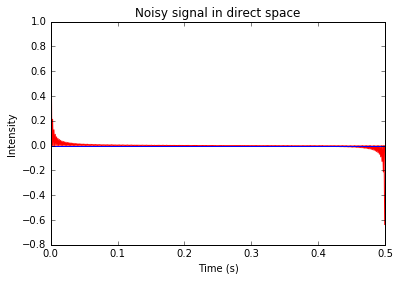

In [102]:
"""
A simple application of Hermitian symmetry : How to generate a real white noise ?

Here, the number of sample if very important, because discrete fourier transform is defined
such that there always be a zero frequency term.

In practice, this means that there are 2 cases (although index are the same):
-dft for even number of samples N: [0:N/2] negative freq, [N/2] : 0 freq, [(N/2)+1::] positive freq
-dft for odd number of samples N: [0:N/2] negative freq, [N/2] 0 freq, [(N/2)+1::] positive freq :

"""


SAMPLING_FREQ = 1000.
NB_SAMPLE = 500
FSig = 120.
epsNoise = 1e-2

t = np.arange(NB_SAMPLE)/SAMPLING_FREQ
signal = np.sin(2*np.pi*FSig*t)

#handle even/odd length cases
sNegFreq = len(signal[0:NB_SAMPLE/2])
sPosFreq = len(signal[(NB_SAMPLE/2)+1::])
sHighFreq = np.minimum(sNegFreq,sPosFreq)

#print "sNegFreq is "+str(sNegFreq)
#print "sPosFreq is "+str(sPosFreq)


#generate a random white noise in real frequency domain
wnreal = np.random.uniform(1-epsNoise,1+epsNoise,size=sNegFreq)
#add zero frequency
wnreal = np.concatenate((wnreal,np.random.uniform(1-epsNoise,1+epsNoise,size=1)))
#real part is even
wnreal = np.concatenate((wnreal,wnreal[::-1][1:sPosFreq+1]))

#print "wnreal is "+str(wnreal)


#add zero frequency : imaginary is always zero
wnim = [0]
#Same thing for imaginary
wnim = np.concatenate((wnim,np.random.uniform(1-epsNoise,1+epsNoise,size=sHighFreq)))
#add zero frequency : imaginary is always zero
wnim = np.concatenate((wnim,[0]))
#imaginay part is odd
wnim = np.concatenate((wnim,-wnim[::-1][1:sPosFreq+1]))

#print "wnim is "+str(wnim)


#Actual complex FFT of the noise
noiseSpectrum = wnreal+1j*wnim

#Check for Hermitian symmetry
#assert( np.isclose(noiseSpectrum[::-1],np.conj(noiseSpectrum)).all() )

#Direct Space
plt.figure(0)
plt.plot(t,np.real(np.fft.ifft(np.fft.ifftshift(noiseSpectrum))),'r')#signal+
plt.plot(t,np.imag(np.fft.ifft(np.fft.ifftshift(noiseSpectrum))),'b')#signal+

plt.title("Noisy signal in direct space")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")

#Compute power spectrum density for both noise and signal
f = np.arange(0.,SAMPLING_FREQ/2.,SAMPLING_FREQ/NB_SAMPLE)
psdNoise = (1./(SAMPLING_FREQ*NB_SAMPLE)) * np.abs(noiseSpectrum)**2
psdSignal = (1./(SAMPLING_FREQ*NB_SAMPLE)) * np.abs(np.fft.fftshift(np.fft.fft(signal)))**2

#Fourier space
#plt.figure(1)
#plt.plot(f,10*np.log10(psdNoise[NB_SAMPLE/2::]))
#plt.plot(f,10*np.log10(psdSignal[NB_SAMPLE/2::]))
#plt.title("Power spectrum density")
#plt.xlabel("Frequency (Hz)")
#plt.ylabel("Power/Frequency (dB/Hz)")


## Hilbert transform and single side band modulation

## Bedrosian Identity
